Продолжим работу с данными, которые были использованы ранее, возмьмем за основу набор данных с дополнительными признаками, которые были созданы в предыдущем задании (оставить все признаки, вне зависимости от того, добавляют они качества или нет).

In [1]:
import pandas as pd

from utils import *

In [2]:
%%time
train = load_data('../data/assignment_2_train_I.csv')
train[:2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Columns: 457 entries, TransactionID to log_TransactionAmt
dtypes: float64(443), int64(9), object(5)
memory usage: 627.6+ MB
Wall time: 8.17 s


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,addr2_D15_std,card1_card2_D15_mean,card1_card2_D15_std,card1_card2_card3_card5_D15_mean,card1_card2_card3_card5_D15_std,card1_card2_card3_card5_addr1_addr2_D15_mean,card1_card2_card3_card5_addr1_addr2_D15_std,int_TransactionAmt,frac_TransactionAmt,log_TransactionAmt
0,2987000,0,2017-12-02 00:00:00,68.5,0,13926,NaN,150.0,3.0,142.0,...,186.33749,0.500000,0.577350,0.500000,0.577350,0.00,NaN,68,0.5,4.226834
1,2987001,0,2017-12-02 00:00:01,29.0,0,2755,404.0,150.0,1.0,102.0,...,186.33749,114.811765,177.751006,114.811765,177.751006,59.75,123.056897,29,0.0,3.367296


In [3]:
trash_cols = [col for col, val in (train.dtypes == 'object').items() if val]

train.drop(trash_cols, axis=1, inplace=True)
train.shape

(180000, 452)

# Задание 0: выбрать любимую модель и схему валидации решения, зафиксировать базовое качество модели.

(144000, 451)
(36000, 451)
(144000,)
(36000,)

0:	learn: 0.6759022	test: 0.6690276	best: 0.6690276 (0)	total: 25.3ms	remaining: 25.3s
100:	learn: 0.8990301	test: 0.8908893	best: 0.8908893 (100)	total: 2.38s	remaining: 21.2s
200:	learn: 0.9165081	test: 0.9058092	best: 0.9058092 (200)	total: 4.64s	remaining: 18.4s
300:	learn: 0.9289293	test: 0.9155330	best: 0.9156153 (297)	total: 6.87s	remaining: 16s
400:	learn: 0.9365899	test: 0.9210138	best: 0.9210138 (400)	total: 9.17s	remaining: 13.7s
500:	learn: 0.9429103	test: 0.9248837	best: 0.9248837 (500)	total: 11.9s	remaining: 11.8s
600:	learn: 0.9473662	test: 0.9281660	best: 0.9282221 (599)	total: 14.4s	remaining: 9.53s
700:	learn: 0.9521433	test: 0.9313102	best: 0.9313207 (697)	total: 17s	remaining: 7.27s
800:	learn: 0.9567699	test: 0.9345168	best: 0.9345168 (800)	total: 19.6s	remaining: 4.86s
900:	learn: 0.9597835	test: 0.9359814	best: 0.9359814 (900)	total: 21.8s	remaining: 2.39s
999:	learn: 0.9628887	test: 0.9384007	best: 0.9384007 (999)	

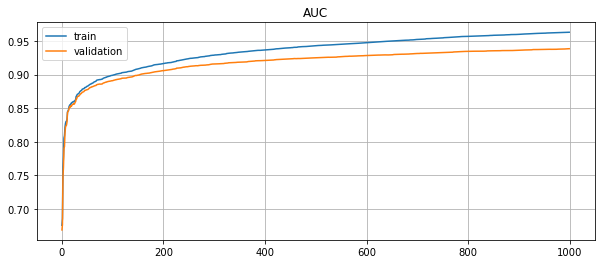

In [4]:
%%time
params = {
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "GPU",
    
    "depth": 5,
    "learning_rate": 0.1,
    
    "verbose": 100
}

cb_model, eval_valid = trainingCatBoost(
    train, 
    target='isFraud',
    params=params,
)

In [5]:
scores = ScoresAUC('roc_auc')
scores.add_score(eval_valid, 'base_line')

,roc_auc
base_line,0.9384


In [6]:
cb_model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'AUC',
 'iterations': 1000,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'grow_policy': 'SymmetricTree',
 'boosting_type': 'Plain',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'devices': '-1',
 'pinned_memory_bytes': '104857600',
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': True,
 'meta_l2_frequency': 0,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 5,
 'border_count': 128,
 'min_fold_size': 100,
 'data_partition': 'DocParallel',
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'min_data_in_leaf': 1,
 'add_ridge_penalty_to_loss_function': Fa

# Задание 1: использовать внутренний способ для оценки важности признаков алгоритма, вывести его в виде диаграммы.

count of importanse features: 364


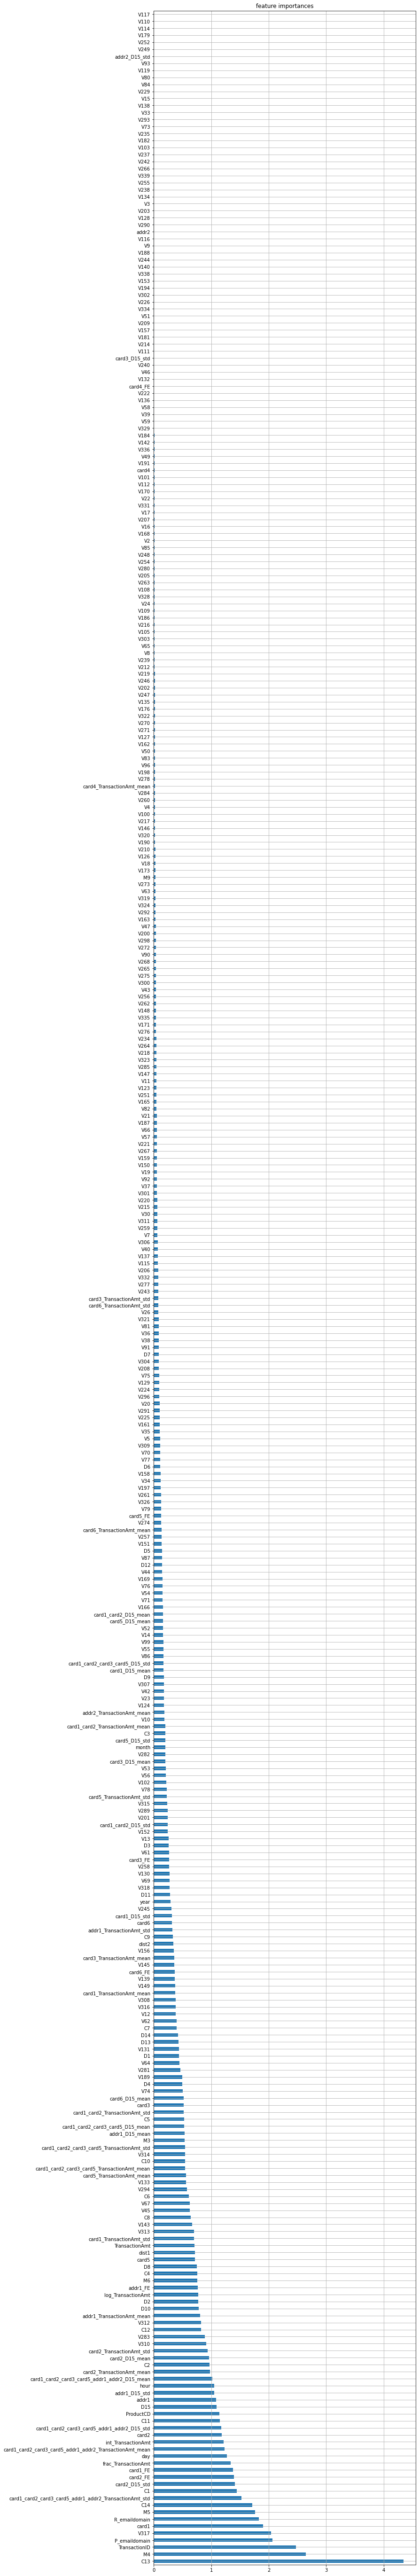

In [7]:
def feature_importances_plot(model, importance=0, figsize=(12, 100)):
    feature_importances = pd.Series(dict(zip(model.feature_names_, model.feature_importances_)))
    feature_importances = feature_importances[feature_importances > importance].sort_values(ascending=False)
    print(f'count of importanse features: {len(feature_importances)}')
    
    feature_importances.plot(kind='barh', figsize=figsize, grid=True, title='feature importances')
    return feature_importances

above_zero_FI = feature_importances_plot(cb_model, importance=0, figsize=(10, 100))

# Задание 2: удалить признаки с нулевой или маленькой важностью, переобучить модель и оценить изменение качества.

In [8]:
train = train[list(above_zero_FI.index) + ['isFraud']]
train.to_csv('../data/assignment_2_train_II.csv', index=False)

(144000, 364)
(36000, 364)
(144000,)
(36000,)

0:	learn: 0.6866357	test: 0.6781256	best: 0.6781256 (0)	total: 22.5ms	remaining: 22.5s
100:	learn: 0.9012530	test: 0.8929973	best: 0.8929973 (100)	total: 2.46s	remaining: 21.9s
200:	learn: 0.9194065	test: 0.9081110	best: 0.9081110 (200)	total: 4.69s	remaining: 18.7s
300:	learn: 0.9301011	test: 0.9162182	best: 0.9162454 (299)	total: 6.88s	remaining: 16s
400:	learn: 0.9383746	test: 0.9215716	best: 0.9215886 (399)	total: 9.01s	remaining: 13.5s
500:	learn: 0.9440210	test: 0.9253802	best: 0.9253802 (500)	total: 11.1s	remaining: 11s
600:	learn: 0.9490904	test: 0.9294523	best: 0.9294632 (597)	total: 13.2s	remaining: 8.74s
700:	learn: 0.9534360	test: 0.9322875	best: 0.9323205 (695)	total: 15.3s	remaining: 6.5s
800:	learn: 0.9573330	test: 0.9351208	best: 0.9351208 (800)	total: 17.3s	remaining: 4.31s
900:	learn: 0.9603639	test: 0.9365033	best: 0.9365253 (886)	total: 19.5s	remaining: 2.14s
999:	learn: 0.9636890	test: 0.9382583	best: 0.9382583 (999)	t

,roc_auc
base_line,0.9384
above_zero,0.9383


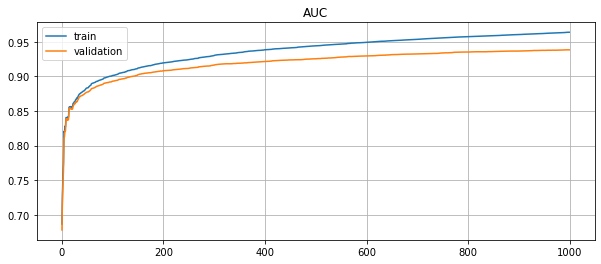

In [9]:
cb_model, eval_valid = trainingCatBoost(
    train[list(above_zero_FI.index) + ['isFraud']], 
    target='isFraud',
    params=params,
)

scores.add_score(eval_valid, 'above_zero')

In [10]:
scores.save_csv()

## Вывод:
- после удаления фичей с нулевой важностью точность упала - видимо, был а удалена важная фича